In [1]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mei-sph6004-pretrain-data/mei_pretrain_data.csv
/kaggle/input/sph6004-assessment1-mimic-iv/Assignment_1_data.csv


# Need to turn on GPU 🌱

# 1. Data read

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data
path = '../input/mei-sph6004-pretrain-data/'
df = pd.read_csv(path+'mei_pretrain_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1.0,55.0,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,1.705939,1.495632,1512.26836,0.0,0.0,1.0,0.0,1.0,3.0,0.0
1,1.0,85.0,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,1.705939,1.495632,2020.00000,1.0,0.0,1.0,1.0,1.0,8.0,0.0
2,1.0,45.0,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.100000,1.100000,1512.26836,1.0,0.0,1.0,1.0,0.0,4.0,0.0
3,1.0,75.0,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,1.705939,1.495632,1592.00000,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,1.0,75.0,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.900000,0.800000,339.00000,0.0,0.0,4.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0.0,85.0,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.600000,0.500000,697.00000,0.0,0.0,1.0,4.0,1.0,10.0,0.0
36485,0.0,35.0,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,1.705939,1.495632,2000.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36486,0.0,65.0,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,1.705939,1.495632,1512.26836,0.0,0.0,1.0,0.0,0.0,3.0,0.0
36487,1.0,75.0,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,1.705939,1.495632,1900.00000,0.0,0.0,0.0,1.0,0.0,5.0,0.0


In [3]:
df.describe()

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
count,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,...,36489.000000,36489.000000,36489.000000,36489.00000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000
mean,0.544822,65.995368,70.935003,103.109572,84.855578,60.431578,105.481843,79.256223,94.454735,147.677286,...,1.705939,1.495632,1512.268360,0.47776,0.261915,1.060237,0.914906,0.826002,5.798104,0.036422
std,0.497994,17.116974,15.049239,20.662520,15.961682,13.333521,23.320004,11.745911,16.679284,22.796128,...,2.926152,2.649308,650.843086,0.82313,0.734331,0.971356,1.050688,1.201319,3.014789,0.187340
min,0.000000,15.000000,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,...,0.100000,0.100000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,60.000000,88.000000,73.347826,53.000000,91.000000,70.916667,84.000000,132.000000,...,0.600000,0.600000,1090.000000,0.00000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,65.000000,70.000000,101.000000,83.541667,60.000000,102.000000,77.880000,93.000000,146.000000,...,1.705939,1.495632,1512.268360,0.00000,0.000000,1.000000,1.000000,0.000000,6.000000,0.000000
75%,1.000000,75.000000,80.000000,115.000000,95.230769,68.000000,115.000000,86.363636,104.000000,161.000000,...,1.705939,1.495632,1900.000000,1.00000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000
max,1.000000,105.000000,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,335.000000,...,78.000000,67.800000,3000.000000,4.00000,4.000000,4.000000,4.000000,4.000000,20.000000,1.000000


In [4]:
# df.info()

# 2. Explore Data Analysis (EDA)
## 👉🏻 Please go to mei-sph6004-part 1

# 3. Feature Engineering 

In [5]:
from sklearn.model_selection import cross_validate, KFold, train_test_split, GridSearchCV

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)


(36489, 46)
(36489,)


## 3.1 Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = StandardScaler().fit_transform(X)

## 3.2 Data split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 3.3 SMOTE

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# oversampling/undersampling
X_train, y_train = smote.fit_resample(X_train, y_train)

# 4. Baseline of Decision Tree Classifier

In [9]:
# Load Data Modelling Libraries
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import xgboost as xgb

## 4.1 Model Training

In [11]:
xgbclf = XGBClassifier()

param_grid_xgbclf = {
    'objective':['binary:logistic'],
    'learning_rate':[0.1,0.3],
    'max_depth': [6,8,12],
    'n_estimators': [200],
    'max_leaves':[20],
    'subsample': [0.6, 0.8, 1],
    'random_state':[0,42,],
    'lambda':[1,4], #L2, increase to make the model more conservative
    'tree_method':['gpu_hist'], # use GPU
}

grid_search_xgbclf = GridSearchCV(
    xgbclf,
    param_grid=param_grid_xgbclf,
    scoring=['recall','f1','accuracy','roc_auc'],
    refit='f1',
    cv=5,
    n_jobs=-1, #use all CPU cores to fit trees
    verbose= 10
)

start=time()
grid_search_xgbclf.fit(X_train, y_train)
print(f"took { str(time() - start)[:7] } seconds")

print(f"Best parameters: {grid_search_xgbclf.best_params_}")
print(f"Best F1 score: {grid_search_xgbclf.best_score_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits

[CV 3/5; 67/72] END lambda=4, learning_rate=0.3, max_depth=12, max_leaves=20, n_estimators=200, objective=binary:logistic, random_state=0, subsample=0.6, tree_method=gpu_hist; accuracy: (test=0.997) f1: (test=0.997) recall: (test=1.000) roc_auc: (test=1.000) total time=   1.7s
[CV 5/5; 67/72] START lambda=4, learning_rate=0.3, max_depth=12, max_leaves=20, n_estimators=200, objective=binary:logistic, random_state=0, subsample=0.6, tree_method=gpu_hist
[CV 5/5; 67/72] END lambda=4, learning_rate=0.3, max_depth=12, max_leaves=20, n_estimators=200, objective=binary:logistic, random_state=0, subsample=0.6, tree_method=gpu_hist; accuracy: (test=0.996) f1: (test=0.996) recall: (test=1.000) roc_auc: (test=1.000) total time=   1.9s
[CV 2/5; 68/72] START lambda=4, learning_rate=0.3, max_depth=12, max_leaves=20, n_estimators=200, objective=binary:logistic, random_state=0, subsample=0.8, tree_method=gpu_hist
[CV 2/5; 68/72] END lambda=

In [12]:
y_pred_xgbclf = grid_search_xgbclf.best_estimator_.predict(X_test)

print("XGBoost Classification:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgbclf))
print("Precision:", precision_score(y_test, y_pred_xgbclf))
print("Recall:", recall_score(y_test, y_pred_xgbclf))
print("F1-score:", f1_score(y_test, y_pred_xgbclf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgbclf))
fpr_xgbclf, tpr_xgbclf, thresholds_xgbclf = roc_curve(y_test, y_pred_xgbclf)

XGBoost Classification:
Accuracy: 0.9612222526719649
Precision: 0.5
Recall: 0.028268551236749116
F1-score: 0.05351170568561873
ROC AUC: 0.5135640689184457


In [13]:
xgbclf = XGBClassifier()

param_grid_xgbclf = {
    'objective':['binary:logistic'],
    'learning_rate':[0.1,0.3],
    'max_depth': [6,8,12],
    'n_estimators': [200,500],
    'max_leaves':[20],
    'subsample': [0.6, 0.8, 1],
    'random_state':[0,42,6004],
    'lambda':[1,4], #L2, increase to make the model more conservative
    'tree_method':['gpu_hist'], # use GPU
}

grid_search_xgbclf = GridSearchCV(
    xgbclf,
    param_grid=param_grid_xgbclf,
    scoring=['recall','f1','accuracy','roc_auc'],
    refit='recall',
    cv=5,
    n_jobs=-1, #use all CPU cores to fit trees
    verbose= 10
)

start=time()
grid_search_xgbclf.fit(X_train, y_train)
print(f"took { str(time() - start)[:7] } seconds")

print(f"Best parameters: {grid_search_xgbclf.best_params_}")
print(f"Best Recall score: {grid_search_xgbclf.best_score_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

[CV 2/5; 69/72] END lambda=4, learning_rate=0.3, max_depth=12, max_leaves=20, n_estimators=200, objective=binary:logistic, random_state=0, subsample=1, tree_method=gpu_hist; accuracy: (test=0.998) f1: (test=0.998) recall: (test=1.000) roc_auc: (test=1.000) total time=   2.1s
[CV 4/5; 69/72] START lambda=4, learning_rate=0.3, max_depth=12, max_leaves=20, n_estimators=200, objective=binary:logistic, random_state=0, subsample=1, tree_method=gpu_hist
[CV 4/5; 69/72] END lambda=4, learning_rate=0.3, max_depth=12, max_leaves=20, n_estimators=200, objective=binary:logistic, random_state=0, subsample=1, tree_method=gpu_hist; accuracy: (test=0.998) f1: (test=0.998) recall: (test=1.000) roc_auc: (test=1.000) total time=   1.8s
[CV 1/5; 70/72] START lambda=4, learning_rate=0.3, max_depth=12, max_leaves=20, n_estimators=200, objective=binary:logistic, random_state=42, subsample=0.6, tree_method=gpu_hist
[CV 1/5; 70/72] END lambda=4, 

In [14]:
y_pred_xgbclf = grid_search_xgbclf.best_estimator_.predict(X_test)

print("XGBoost Classification:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgbclf))
print("Precision:", precision_score(y_test, y_pred_xgbclf))
print("Recall:", recall_score(y_test, y_pred_xgbclf))
print("F1-score:", f1_score(y_test, y_pred_xgbclf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgbclf))
fpr_xgbclf, tpr_xgbclf, thresholds_xgbclf = roc_curve(y_test, y_pred_xgbclf)

XGBoost Classification:
Accuracy: 0.959440942724034
Precision: 0.24
Recall: 0.02120141342756184
F1-score: 0.03896103896103897
ROC AUC: 0.5092464658014502


## 4.2 Confusion Matrix

Text(50.722222222222214, 0.5, 'True')

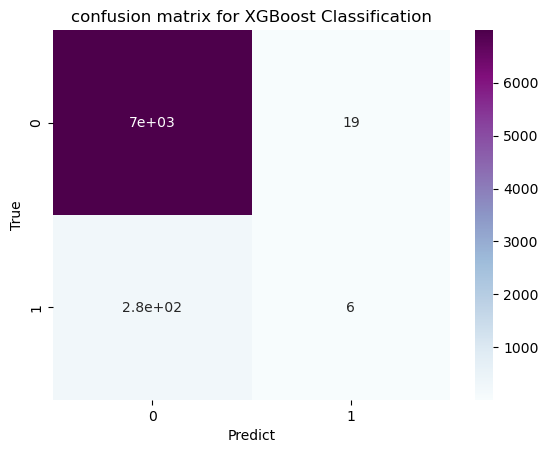

In [15]:
from sklearn.metrics import confusion_matrix
cm_xgbclf= confusion_matrix(y_test, y_pred_xgbclf, labels=[0, 1])
fig, ax =plt.subplots()

sns.heatmap(cm_xgbclf,annot=True,ax=ax, cmap="BuPu")
ax.set_title('confusion matrix for XGBoost Classification')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [16]:
feature_list = df.columns[:-1]
print('feature_list:',feature_list)

importances = list(grid_search_xgbclf.best_estimator_.feature_importances_)
importances

feature_list: Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max',
       'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min',
       'creatinine_max', 'hemoglobin_min', 'hemoglobin_max', 'pt_min',
       'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_max', 'bilirubin_total_min', 'urineoutput',
       'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')


[0.056412414,
 0.117939524,
 0.0046737175,
 0.003791422,
 0.004200663,
 0.0037662685,
 0.004923981,
 0.0039891084,
 0.003981925,
 0.0044249925,
 0.0038646345,
 0.0043666353,
 0.004371222,
 0.003951042,
 0.009154043,
 0.0050068586,
 0.004324028,
 0.008701725,
 0.017143954,
 0.009024218,
 0.01694961,
 0.004994369,
 0.004611581,
 0.0050797486,
 0.0051661218,
 0.0091875,
 0.012457665,
 0.0042351843,
 0.0039333915,
 0.0051042805,
 0.006610573,
 0.02445038,
 0.005769995,
 0.010548958,
 0.011527085,
 0.004447108,
 0.02802093,
 0.013154323,
 0.027525773,
 0.010785666,
 0.07114419,
 0.02322275,
 0.03373013,
 0.27801928,
 0.055229418,
 0.046081576]

## 4.3 Feature Importances

In [17]:
# Dictionaries with variable and importance
feature_importances = {feature:round(importance, 2) for feature, importance in zip(feature_list, importances)}

feature_importances

{'gender': 0.06,
 'age': 0.12,
 'heart_rate_min': 0.0,
 'heart_rate_max': 0.0,
 'heart_rate_mean': 0.0,
 'mbp_min': 0.0,
 'mbp_max': 0.0,
 'mbp_mean': 0.0,
 'sbp_min': 0.0,
 'sbp_max': 0.0,
 'sbp_mean': 0.0,
 'dbp_min': 0.0,
 'dbp_max': 0.0,
 'dbp_mean': 0.0,
 'temperature_min': 0.01,
 'temperature_max': 0.01,
 'temperature_mean': 0.0,
 'lactate_min': 0.01,
 'lactate_max': 0.02,
 'ph_min': 0.01,
 'ph_max': 0.02,
 'glucose_min': 0.0,
 'glucose_max': 0.0,
 'wbc_min': 0.01,
 'wbc_max': 0.01,
 'creatinine_min': 0.01,
 'creatinine_max': 0.01,
 'hemoglobin_min': 0.0,
 'hemoglobin_max': 0.0,
 'pt_min': 0.01,
 'pt_max': 0.01,
 'alt_max': 0.02,
 'alt_min': 0.01,
 'alp_max': 0.01,
 'alp_min': 0.01,
 'ast_min': 0.0,
 'ast_max': 0.03,
 'bilirubin_total_max': 0.01,
 'bilirubin_total_min': 0.03,
 'urineoutput': 0.01,
 'sofa_coagulation': 0.07,
 'sofa_liver': 0.02,
 'sofa_cardiovascular': 0.03,
 'sofa_cns': 0.28,
 'sofa_renal': 0.06,
 'charlson_comorbidity_index': 0.05}

In [18]:
# Sort the feature importances in decreasing order
feature_importances = sorted(feature_importances.items(), key = lambda x: x[1], reverse = True)

# # Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sofa_cns             Importance: 0.2800000011920929
Variable: age                  Importance: 0.11999999731779099
Variable: sofa_coagulation     Importance: 0.07000000029802322
Variable: gender               Importance: 0.05999999865889549
Variable: sofa_renal           Importance: 0.05999999865889549
Variable: charlson_comorbidity_index Importance: 0.05000000074505806
Variable: ast_max              Importance: 0.029999999329447746
Variable: bilirubin_total_min  Importance: 0.029999999329447746
Variable: sofa_cardiovascular  Importance: 0.029999999329447746
Variable: lactate_max          Importance: 0.019999999552965164
Variable: ph_max               Importance: 0.019999999552965164
Variable: alt_max              Importance: 0.019999999552965164
Variable: sofa_liver           Importance: 0.019999999552965164
Variable: temperature_min      Importance: 0.009999999776482582
Variable: temperature_max      Importance: 0.009999999776482582
Variable: lactate_min          Importance

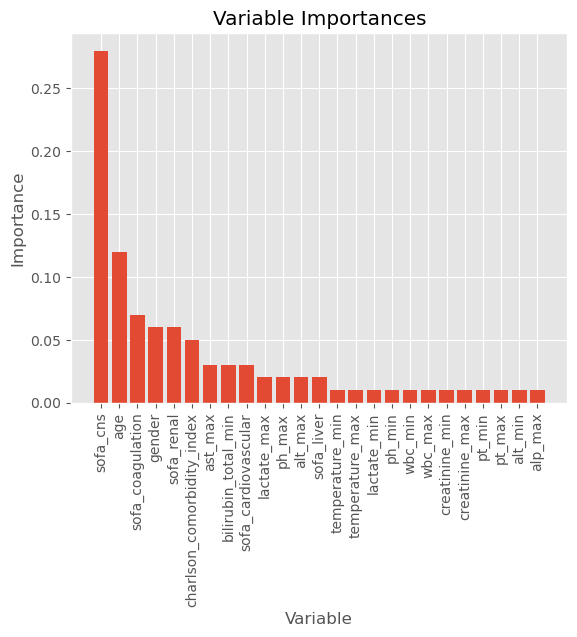

In [19]:
plt.style.use('ggplot')

top = 25
# the x axis for the plot 
x_axis = [i for i in range(top)]
plot_importance = feature_importances[:top]

# Creat a bar plot 
plt.bar(x_axis, [i[1] for i in plot_importance], orientation = 'vertical')
# Define xtick labels 
plt.xticks(x_axis, [i[0] for i in plot_importance], rotation='vertical')
# Define axis labels and titles
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

In [29]:
import shap
# make sure the SHAP values add up to marginal predictions
pred = grid_search_xgbclf.best_estimator_.predict(X, output_margin=True)
explainer = shap.TreeExplainer(grid_search_xgbclf.best_estimator_)
shap_values = explainer.shap_values(X)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


1.7166138e-05

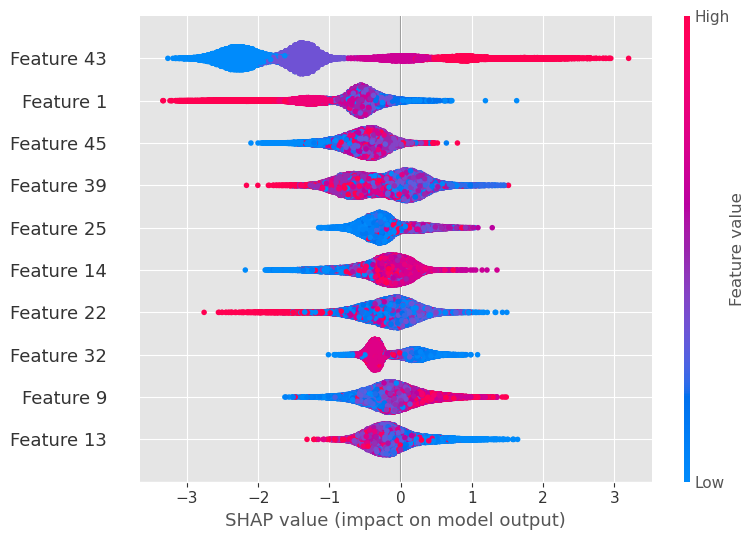

In [30]:
shap.summary_plot(shap_values, X, max_display=10)

# 5. Model optimization 

### Genetic Algorithm (GA)

In [35]:
!pip install sklearn-genetic

In [ ]:
from genetic_selection import GeneticSelectionCV

estimator = XGBClassifier(
    learning_rate= 0.3,
    max_depth=6,
    max_leaves=20,
    n_estimators=200,
    objective='binary:logistic',
    random_state=6004,
    tree_method='gpu_hist'
)
    
GA_model = GeneticSelectionCV(
    estimator, 
    cv=5, 
    verbose=10,
    scoring="accuracy", 
    max_features=20,
    n_population=10, 
    crossover_proba=0.5,
    mutation_proba=0.2, 
    n_generations=20,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=5, 
    n_gen_no_change=10,
    caching=True, 
    n_jobs=-1
)
GA_model = GA_model.fit(X_train, y_train)

Selecting features with genetic algorithm.
